### Lab Activity 4.1: Gender Bias in Exam Performance – A Hypothesis Testing Approach



#### Objective
To analyze whether there is a significant difference in exam performance between male and female students using statistical hypothesis testing.



#### Dataset
Students Performance in Exams dataset: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams


#### Requirements
- Python (Latest Version)
- Jupyter Notebook
- Libraries: pandas, numpy, matplotlib, seaborn, scipy

In [3]:


# Step 1: Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu


In [5]:

# Step 2: Load Dataset
df = pd.read_csv("StudentsPerformance.csv")  # Update with correct file path


In [13]:

# Step 3: Data Inspection
print(df.head())


   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [14]:

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


In [15]:

print(df.describe())

       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


In [16]:

print(df.isnull().sum())  # Check for missing values

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


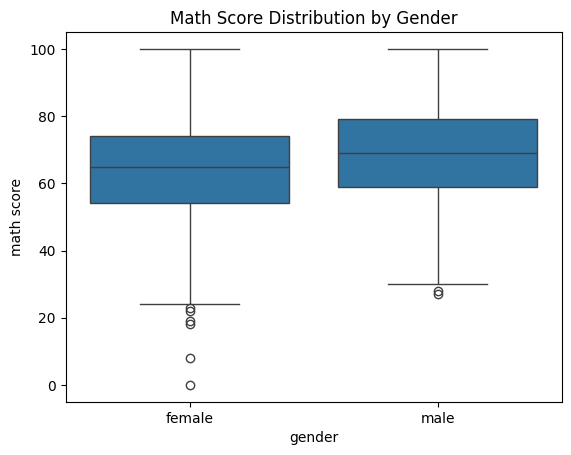

In [8]:

# Step 4: Exploratory Data Analysis (EDA)
sns.boxplot(x='gender', y='math score', data=df)
plt.title("Math Score Distribution by Gender")
plt.show()


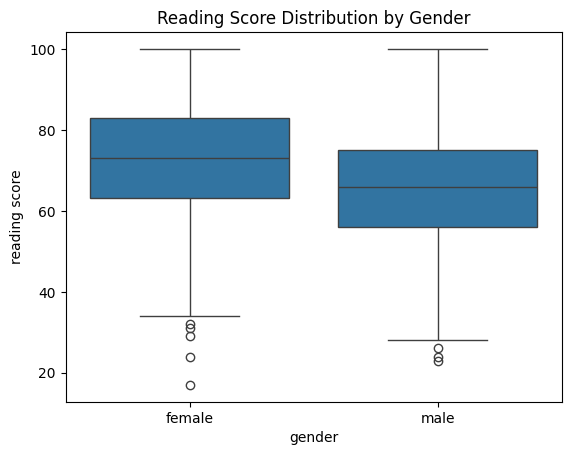

In [9]:

sns.boxplot(x='gender', y='reading score', data=df)
plt.title("Reading Score Distribution by Gender")
plt.show()


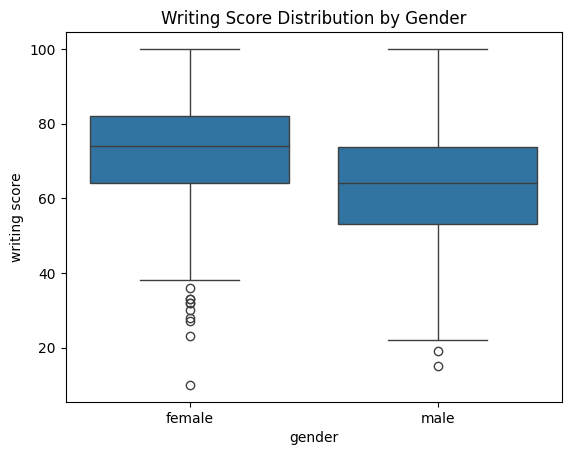

In [10]:

sns.boxplot(x='gender', y='writing score', data=df)
plt.title("Writing Score Distribution by Gender")
plt.show()

In [11]:

# Step 5: Hypothesis Testing
# Define null and alternative hypotheses
# H0: No significant difference in exam scores between male and female students
# H1: A significant difference exists

def perform_ttest(score_column):
    male_scores = df[df['gender'] == 'male'][score_column]
    female_scores = df[df['gender'] == 'female'][score_column]
    t_stat, p_value = ttest_ind(male_scores, female_scores, equal_var=False)  # Welch’s t-test
    return t_stat, p_value

# Conduct t-tests
math_t, math_p = perform_ttest('math score')
reading_t, reading_p = perform_ttest('reading score')
writing_t, writing_p = perform_ttest('writing score')

# Display results
print(f"Math Score T-test: t-statistic = {math_t:.3f}, p-value = {math_p:.5f}")
print(f"Reading Score T-test: t-statistic = {reading_t:.3f}, p-value = {reading_p:.5f}")
print(f"Writing Score T-test: t-statistic = {writing_t:.3f}, p-value = {writing_p:.5f}")


Math Score T-test: t-statistic = 5.398, p-value = 0.00000
Reading Score T-test: t-statistic = -7.968, p-value = 0.00000
Writing Score T-test: t-statistic = -9.998, p-value = 0.00000


In [12]:

# Step 6: Interpretation
alpha = 0.05  # Significance level

def interpret_results(p_value, score_type):
    if p_value < alpha:
        print(f"There is a significant gender difference in {score_type} scores (p < 0.05). Reject H0.")
    else:
        print(f"No significant gender difference in {score_type} scores (p >= 0.05). Fail to reject H0.")

interpret_results(math_p, "Math")
interpret_results(reading_p, "Reading")
interpret_results(writing_p, "Writing")


There is a significant gender difference in Math scores (p < 0.05). Reject H0.
There is a significant gender difference in Reading scores (p < 0.05). Reject H0.
There is a significant gender difference in Writing scores (p < 0.05). Reject H0.




#### Conclusion
- The hypothesis tests determine if there is a statistically significant difference between male and female students' scores.
- Interpretation of p-values helps decide whether gender bias exists in exam performance.
- Further analysis can explore other factors like parental education, lunch type, and test preparation courses.

